In [10]:
import time

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline.backend_inline

import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data
from matplotlib.colors import to_rgba
from torch import Tensor
from tqdm.notebook import tqdm # Progress bar

matplotlib_inline.backend_inline.set_matplotlib_formats("svg", "pdf") # For export

# Pytorch 기본

In [2]:
print("Using torch", torch.__version__)

Using torch 1.12.1.post200


In [3]:
torch.manual_seed(42) # Setting the seed

## Tensor
GPU를 지원하는 Numpy 배열과 동일한 개념의 pytorch

In [5]:
x = Tensor(2, 3, 4)
x

tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 9.1835e-41, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]])

> ### 초기화

- torch.zeros: 0으로 채워진 tensor를 만든다.
- torch.ones: 1로 채워진 tensor를 만든다.
- torch.rand: 0과 1 사이의 균일한 랜덤 값으로 tensor를 만든다.
- torch.randn: 평균 0, 분산 1인 정규 분포에서 랜덤 값으로 tensor를 만든다.
- torch.arange: N, N+1, N+2, ... , M인 값을 가지는 tensor를 만든다.
- torch.Tensor(input list): 제공한 리스트 요소로 tensor를 만든다.

In [6]:
x = Tensor([[1, 2], [3, 4]])
x

tensor([[1., 2.],
        [3., 4.]])

In [7]:
x = torch.rand(2, 3, 4)
x

tensor([[[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411, 0.4294],
         [0.8854, 0.5739, 0.2666, 0.6274],
         [0.2696, 0.4414, 0.2969, 0.8317]]])

In [8]:
# tensor 형태 출력

shape = x.shape
print("Shape:", shape)

size = x.size()
print("Size:", size)

dim1, dim2, dim3 = x.size()
print("Size:", dim1, dim2, dim3)

Shape: torch.Size([2, 3, 4])
Size: torch.Size([2, 3, 4])
Size: 2 3 4


In [11]:
r# numpy -> tensor

np_arr = np.array([[1, 2], [3, 4]])
tensor = torch.from_numpy(np_arr)

print("Numpy array:", np_arr)
print("Pytorch tensor:", tensor)

Numpy array: [[1 2]
 [3 4]]
Pytorch tensor: tensor([[1, 2],
        [3, 4]])


In [12]:
# tensor -> numpy 

tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

PyTorch tensor: tensor([0, 1, 2, 3])
Numpy array: [0 1 2 3]


tensor를 numpy로 변환하는 경우, tensor가 GPU에 있다면 CPU로 바꿔주어야 함.

```
np_arr = tensor.cpu().numpy()
```

### 연산
[PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#) 참조

- 덧셈 연산

In [13]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
y = x1 + x2

print("X1", x1)
print("X2", x2)
print("Y", y)

X1 tensor([[0.1053, 0.2695, 0.3588],
        [0.1994, 0.5472, 0.0062]])
X2 tensor([[0.9516, 0.0753, 0.8860],
        [0.5832, 0.3376, 0.8090]])
Y tensor([[1.0569, 0.3448, 1.2448],
        [0.7826, 0.8848, 0.8151]])


In [14]:
x1 = torch.rand(2, 3)
x2 = torch.rand(2, 3)
print("X1 (before)", x1)
print("X2 (before)", x2)

x2.add_(x1) #add_ 와 같이 현재 위치에서의 작업은 '_'을 사용하여 표시함.
print("X1 (after)", x1)
print("X2 (after)", x2)

X1 (before) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (before) tensor([[0.7104, 0.9464, 0.7890],
        [0.2814, 0.7886, 0.5895]])
X1 (after) tensor([[0.5779, 0.9040, 0.5547],
        [0.3423, 0.6343, 0.3644]])
X2 (after) tensor([[1.2884, 1.8504, 1.3437],
        [0.6237, 1.4230, 0.9539]])


- 형태 변환  
요소의 수가 같은 경우에 변환 가능.

In [15]:
x = torch.arange(6)
x

tensor([0, 1, 2, 3, 4, 5])

In [16]:
x = x.view(2, 3)
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [18]:
x = x.permute(1, 0) # 0과 1 차원을 교체한다.
x

tensor([[0, 1, 2],
        [3, 4, 5]])

- 행렬 곱셉  

    - torch.matmul: 두 텐서의 행렬 곱 수행. 브로드캐스팅 지원.  
    - torch.mm: 두 행렬의 행렬 곱은 진행하나, 브로드캐스팅 미지원.  
    - torch.bmm: batch 차원을 지원하는 행렬 곱 수행.  
    - torch.einsum:

주로 torch.matmul과 torch.bmm을 사용한다.

In [19]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [20]:
W = torch.arange(9).view(3, 3)
print("W", W)

W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [21]:
h = torch.matmul(x, W)
print("h", h)

h tensor([[15, 18, 21],
        [42, 54, 66]])


- 인덱싱

In [22]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [23]:
print(x[:, 1])

tensor([1, 5, 9])


In [24]:
print(x[0])

tensor([0, 1, 2, 3])


In [26]:
print(x[:2, -1])

tensor([3, 7])


In [27]:
print(x[1:3, :])

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


- Dynamic Computation Graph & Backpropagation

In [28]:
x = torch.ones((3, ))
x.requires_grad

False

In [29]:
x.requires_grad_(True)
x.requires_grad

True

이 개념을 이해하기 위한 함수 (x: parameters / y: output) => parameter

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

In [30]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # float tensor만이 기울기를 가질 수 있음.
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


In [31]:
a = x + 2
b = a**2
c = b + 3
y = c.mean()

print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


<center style="width: 100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/pytorch_computation_graph.svg" width="200px"></center>

backward(): 계산 그래프(computation graph)에서 역전파(backpropagation)을 수행하는 함수. requires_grad=True 속성을 가진 tensor의 기울기를 효과적으로 구할 수 있게 한다.

In [32]:
y.backward()

In [33]:
x.grad

tensor([1.3333, 2.0000, 2.6667])

- GPU 지원  

GPU는 수천 개의 작은 계산을 병렬로 수행할 수 있게 하여, 대규모 행렬 연산에 적합함.

> CPU와 GPU의 장단점 비교([Kevin Krewell, 2009](https://blogs.nvidia.com/blog/whats-the-difference-between-a-cpu-and-a-gpu/))
> <center style="width: 100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/comparison_CPU_GPU.png" width="700px"></center>

In [34]:
# 사용 가능 GPU 여부 확인

gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


만약 GPU가 있음에도 False가 출력되는 경우, CUDA-version을 확인해 보길 바람.     


기본적으로 tensor는 CPU에 저장되기 때문에 to(...)나 cuda()를 사용해 tensor를 GPU로 보낼 수 있다.  
하지만 GPU를 가진 경우엔 GPU로, 없는 경우엔 CPU를 사용하도록 코드를 작성하는 것이 좋다.

In [35]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


In [42]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

X tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [43]:
x = torch.randn(5000, 5000)

# CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# GPU version
if torch.cuda.is_available():
    x = x.to(device)
    #CUDA는 비동기식이므로, 다른 타이밍의 함수를 사용해야함.
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()    # GPU에서 모든 것이 끝나길 기다린다.
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s") # milliseconds -> seconds

CPU time: 0.15322s
GPU time: 0.17725s


연산 크기와 가지고 있는 CPU/GPU에 따라 속도는 50배 이상의 차이를 보일 수 있다.

난수를 생성할 때 CPU와 GPU 간에 seed가 동기화되지 않기 때문에, 재현가능한 코드를 위해서는 GPU에 따로 seed를 설정해야 한다.

In [ ]:
# GPU 연산에 대한 seed 연산
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

# 추가적으로, 어떤 연산을 효율성을 위해 확률적으로 구현된다.
# 재현성을 위해 GPU에서 모든 연산을 결정론적으로 구현하고자한다.
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

- 예제: Continuous XOR

Pytorch를 이용하여 신경망을 만든다면, Tensor를 이용하여 parameter 지정하고, gradients를 계산하고 parameter를 조정할 수 있다.  
하지만 너무 많은 파라미터를 가졌다면 빠르게 복잡해지므로, 파이토치에서는 torch.nn이라는 패키지로 더 편리하게 신경망을 구축할 수 있다.

밑의 그림은 XOR을 연속 공간으로 이동하고 이진 입력에 약간의 가우스 노이즈를 도입한 분류 그래프이다.

<center style="width: 100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/continuous_xor.svg" width="350px"></center>

- 모델  

torch.nn 패키지는 유용한 선형 네트워크 레이어, 활성화 함수, 손실 함수 등을 포함한다.([참고](https://pytorch.org/docs/stable/nn.html))

In [44]:
import torch.nn as nn

torch.nn.functional에는 네트워크 레이어에서 사용하는 함수가 포함되어 있음.  
이는 nn.Module이나 torch.nn을 정의하는 것과는 대조적이고 실제로 많이 사용되므로 이곳에도 가져온다.

In [45]:
import torch.nn.functional as F

- nn.Module  

In [46]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        # 자신만의 모듈을 위한 초기화

    def forward(self, x):
        # 모듈의 계산을 수행하는 함수
        pass

forward 함수는 모듈을 호출할 때 실행됨.
```python
nn = MyModule()
nn(x)
```
init 함수에서는 주로 nn.Parameter를 이용하여 parameter를 생성하거나, forward 함수에서 사용할 모듈을 정의한다.
역전파 계산은 자동적으로 수행되지만 원할 경우 덮어쓸 수도 있다.

- Simple classifier  

이제, torch.nn 패키지에서 미리 정의된 모듈을 사용할 수 있고 자신만의 작은 신경망을 정의할 수 있다.  
input laye, tanh을 활성화 함수로 사용하는 한 층의 hidden layer, output layer로 구성된 가장 작은 신경망을 사용할 것이다. 

<center width="100%"><img src="https://github.com/Lightning-AI/lightning-tutorials/raw/main/course_UvA-DL/01-introduction-to-pytorch/small_neural_network.svg" width="300px"></center>

파란색은 입력층(x1, x2), 흰색은 tanh 활성화 함수를 가진 hidden층, 그리고 빨간색은 출력층이다. 

In [47]:
class SimpleClassfier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # 네트워크를 구성할 때 필요한 모듈 초기화.
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # 예측을 결정할 모델의 게산 수행
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [48]:
model = SimpleClassfier(num_inputs=2, num_hidden=4, num_outputs=1)
# 모델의 모든 submodule을 출력.
print(model)

SimpleClassfier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [49]:
# parameters() or named_parameters() 함수를 사용하면 module의 parameter를 가져올 수 있음.
# named_parameters(): 각 파라미터 객체의 이름도 함께 가져온다.

for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


- data  

PyTorch는 torch.utils.data 패키지에서 학습과 테스트 data를 효과적으로 로드하는 몇 가지 기능을 제공한다.

In [50]:
import torch.utils.data as data

data 패키지는 data.Dataset과 data.DataLoader라는 두 개의 PyTorch에서 data를 다루는 표준 인터페이스 클래스를 정의한다.

```dataset 클래스```

In [51]:
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        """XORDataset.
        
        Args:
            size: 만들고 싶은 data point의 수
            std: ...???
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # XOR dataset의 각 data point는 0이나 1 중 하나의 값을 가진 x와 y라는 두 개의 변수를 가진다.
        # label은 XOR 조합이다. x=y일 때는 0, x!=y일 때는 1의 값을 가진다.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # 영어.. 으윽.........
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # 흐흐흑....
        return self.size

    def __getitem__(self, idx):
        # 
        #
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [52]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 200
Data point 0: (tensor([1.0087, 1.1676]), tensor(0))


In [53]:
def visualize_samples(data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

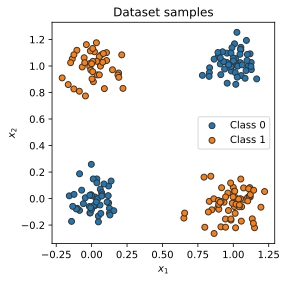

In [54]:
visualize_samples(dataset.data, dataset.label)
plt.show()

```data loader class```

자동 일괄 처리, 다중 프로세스 데이터 로드 그리고 더 많은 형태를 지원하는 dataset에 대한 Python 이터러블을 나타낸다.  
`__getitem__` 함수를 사용하여 dataset과 소통하고, 출력을 첫번째 차원에 tensor로 쌓아 배치를 만든다.  
    - batch_size: 배치 마다 쌓는 샘플 수  
    - shuffle: True일 때, 랜덤으로 정렬된 data가 반환됨. 확률론을 도입하는 훈련에서 중요함.  
    - num_workers: 데이터 로드에 필요한 subprocess의 수.   
    - pin_memory: True일 때,  
    - drop_last:  

In [55]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [56]:
# next(iter(...)): data loader의 첫 배치를 가져온다.
# shuffle이 True라면, 매 실행마다 다른 배치를 반환된다.
# 모든 dataset에서 반복되도록 하기 위해 "for batch in data_loader: ..."을 사용할 수 있다.
data_inputs, data_labels = next(iter(data_loader))

# 출력의 형태는 [batch_size, d_1, ... , d_N]이다.
# d_1, ... , d_N은 dataset class에서 반환된 data point의 차원이다.
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[ 0.1197, -0.0323],
        [ 1.0279,  0.9158],
        [ 0.9859,  0.9621],
        [ 0.1918,  0.9145],
        [ 1.1049,  0.9993],
        [ 1.0926,  1.1929],
        [ 0.8626, -0.0016],
        [ 1.2210,  0.0532]])
Data labels torch.Size([8]) 
 tensor([0, 0, 0, 1, 0, 0, 1, 1])


- Optimization

모델과 dataset를 정의한 후에, 모델의 최적화를 준비한다.훈련 동안 다음 단계들을 수행한다.

1. data loader에서 배치를 얻는다.
2. 그 배치에 대한 모델에서 예측을 가져온다
3. 예측과 label 사이의 차이를 기반으로 손실(loss)을 계산한다.
4. 역전파: 손실과 관련된 모든 parameter의 기울기를 게산한다.
5. 기울기의 방향으로 모델의 parameter를 업데이트한다.

- loss module

자동적으로 computation graph에 추가되는 몇 개의 tensor 연산을 수행하여 배치의 손실을 계산할 수 있다.  
밑의 예의 경우, 이진 분류에서 BCE(Binary Cross Entropy)를 사용할 수 있다.
$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

모든 x와 y의 값은 [0, 1] 범위 안에 있다. PyTorch는 사전 정의된 손실 함수를 제공한다.([참고](https://pytorch.org/docs/stable/nn.html#loss-functions))  
BCE 모듈의 경우 nn.BCELoss(), nn.BCEWithLogitsLoss() 두 모듈을 가진다.

In [57]:
loss_module = nn.BCEWithLogitsLoss()

- SGD(Stochastic Gradient Descent)  

torch.optim 패키지: parameter를 업데이트하기 위한 인기있는 optimiser가 구현됨.
torch.optim.SGD: 가장 간단한 optimizer

In [62]:
# Optimizer은 모델의 parameter를 입력받는다.: model.parameters()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

duddj gotjr... sjan djfuqek.... 

- 훈련  

In [63]:
# 크기가 1000인 dataset을 만든다.
train_dataset = XORDataset(size=1000)
# batch 크기를 128로 하여 dataloader을 만든다.
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [64]:
model.to(device)

SimpleClassfier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

model.train(): 모델을 훈련 모드로 설정

In [67]:
def train_model(model, optimizer, DataLoader, loss_module, num_epochs=100):
    # 모델을 훈련 모드로 설정
    model.train()

    # 훈련 loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            # Step 1: 입력 data를 device로 옮긴다.
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # Step 2: 입력 data로 모델을 돌린다.
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)    # 출력은 [Batch size, 1]이지만 Batch size만 가져오기 위해 차원을 없앤다.

            # Step 3: 손실 계산
            loss = loss_module(preds, data_labels.float())

            # Step 4: 역전파
            # 기울기 연산 전에 모두 0인지 확인해야 함.
            # 기울기는 덮어쓰여질 수 없지만 기존의 것에 더해진다.
            optimizer.zero_grad()
            # 역전파 수행
            loss.backward()

            # Step 5: parameter 업데이터
            optimizer.step()

In [68]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

- 모델 저장  ([참고](https://pytorch.org/tutorials/beginner/saving_loading_models.html))

모델 학습을 마지고 나중에 동일한 가중치를 로드할 수 있도록 모델을 디스크에 저장한다.  

In [70]:
# state_dict: 학습 가능한 모든 parameter를 모델에서 추출하는 함수
state_dict = model.state_dict()
state_dict

OrderedDict([('linear1.weight',
              tensor([[ 2.1514, -3.2645],
                      [-2.6401, -2.3795],
                      [ 3.4564, -2.4745],
                      [-0.7363, -0.0910]], device='cuda:0')),
             ('linear1.bias',
              tensor([-0.6721,  0.4946,  0.8364,  0.4292], device='cuda:0')),
             ('linear2.weight',
              tensor([[ 4.5989, -3.7077, -4.3173,  0.5501]], device='cuda:0')),
             ('linear2.bias', tensor([1.0699], device='cuda:0'))])

In [71]:
# torch.save: 상태 dictionary 저장
torch.save(state_dict, "our_model.tar")

In [73]:
# torch.load: 디스크에서 상태 dict를 불러온다.
state_dict = torch.load("our_model.tar")

# 새 모델을 만들고 상태를 불러온다.
# load_state_dict: parameter를 새로운 값으로 덮어 씌운다.
new_model = SimpleClassfier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# parameter가 같은지 검증한다.
print("Original model\n", model.state_dict())
print("\nLoasded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 2.1514, -3.2645],
        [-2.6401, -2.3795],
        [ 3.4564, -2.4745],
        [-0.7363, -0.0910]], device='cuda:0')), ('linear1.bias', tensor([-0.6721,  0.4946,  0.8364,  0.4292], device='cuda:0')), ('linear2.weight', tensor([[ 4.5989, -3.7077, -4.3173,  0.5501]], device='cuda:0')), ('linear2.bias', tensor([1.0699], device='cuda:0'))])

Loasded model
 OrderedDict([('linear1.weight', tensor([[ 2.1514, -3.2645],
        [-2.6401, -2.3795],
        [ 3.4564, -2.4745],
        [-0.7363, -0.0910]])), ('linear1.bias', tensor([-0.6721,  0.4946,  0.8364,  0.4292])), ('linear2.weight', tensor([[ 4.5989, -3.7077, -4.3173,  0.5501]])), ('linear2.bias', tensor([1.0699]))])


- 평가  

테스트 세트를 이용한 모델 평가.
평가 시에는 기울기를 계산할 필요가 없다. -> 필요 메모리 줄고 모델 속도 빨라짐.

In [74]:
test_dataset = XORDataset(size=500)

# drop_last=False : 마지막 배치의 크기가 128보다 작더라도 버리지 않도록 함.
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

사용할 정확도

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

In [83]:
# with torch.no_grad(): ...을 이용하여 computation graph를 비활성화할 수 있다.

def eval_model(model, data_loader):
    model.eval() # 모델을 eval mode로 설정
    true_preds, num_preds = 0.0, 0.0

    with torch.no_grad():
        for data_inputs, data_labels in data_loader:
            #
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid
            pred_labels = (preds >= 0.5).long() #

            #
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]

    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [84]:
eval_model(model, test_data_loader)

Accuracy of the model: 100.00%


- classifiction boundaries 시각화


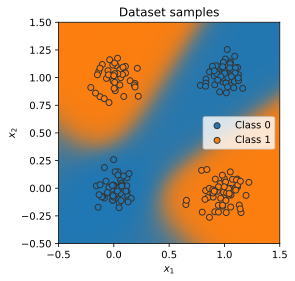

In [93]:
@torch.no_grad()    #
def visualize_classification(model, data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = Tensor(to_rgba("C0")).to(device)
    c1 = Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2) # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    # Specifying "None" in a dimension vreates a new one
    output_image = (1 - preds) * c0[None, None] + preds *c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )   # Convert to numpy array. This only works for tensors on CPU. hence first push to CPu
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)

visualize_classification(model, dataset.data, dataset.label)
plt.show()